# Final Project CSCI 182
## Members: Danny Bowers, Patrick Callahan, Allen Shahshahani

In [1]:
#Import the necessary library to access the Spotify API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#attach the Spotify API necessities. 
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="d7ab2112e221473a8b2a7a88c1aac45e",
                                                           client_secret="fde374bcf24947c1812412a474d3ef94"))

#This will query the top 20 tracks from the artist Milky Chance
results = sp.search(q='milky chance', limit=20)
for idx, track in enumerate(results['tracks']['items']):
    print(idx, track['name'])

0 Stolen Dance
1 Cocoon
2 Flashed Junk Mind
3 Colorado
4 Tainted Love
5 Down By The River
6 Colorado
7 Unknown Song
8 Levitating
9 Don't Let Me Down
10 Save Your Tears
11 Daydreaming
12 Fairytale
13 Daydreaming
14 Sweet Sun
15 Synchronize
16 Love Again
17 Blossom
18 The Game
19 La Noche De Anoche


In [2]:
lz_uri = 'spotify:artist:36QJpDe2go2KgaRleHCDTp'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id="d7ab2112e221473a8b2a7a88c1aac45e",
                                                           client_secret="fde374bcf24947c1812412a474d3ef94"))
results = spotify.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Stairway to Heaven - Remaster
audio    : https://p.scdn.co/mp3-preview/8226164717312bc411f8635580562d67e191a754?cid=d7ab2112e221473a8b2a7a88c1aac45e
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Immigrant Song - Remaster
audio    : https://p.scdn.co/mp3-preview/8455599677a13017978dcd3f4b210937f0a16bcb?cid=d7ab2112e221473a8b2a7a88c1aac45e
cover art: https://i.scdn.co/image/ab67616d0000b27390a50cfe99a4c19ff3cbfbdb

track    : Whole Lotta Love - 1990 Remaster
audio    : https://p.scdn.co/mp3-preview/ce11b19a4d2de9976d7626df0717d0073863909c?cid=d7ab2112e221473a8b2a7a88c1aac45e
cover art: https://i.scdn.co/image/ab67616d0000b273fc4f17340773c6c3579fea0d

track    : Black Dog - Remaster
audio    : https://p.scdn.co/mp3-preview/9b76619fd9d563a48d38cc90ca00c3008327b52e?cid=d7ab2112e221473a8b2a7a88c1aac45e
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Kashmir - Remaster
audio    : https://p.scdn.co/mp3

# Where the Project Begins

In [3]:
import spotipy
import sys
import spotipy.util as util

# Add the tokens necessary to use the Spotify API
username = 'connor19802'
SPOTIPY_CLIENT_ID = 'd7ab2112e221473a8b2a7a88c1aac45e'
SPOTIPY_CLIENT_SECRET = 'fde374bcf24947c1812412a474d3ef94'
SPOTIPY_REDIRECT_URI='http://localhost:8080/callback'

In [4]:
# Authenticate the user and make the scope capable of reading the top values for the authenticated user
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=SPOTIPY_CLIENT_ID,
                           client_secret=SPOTIPY_CLIENT_SECRET,
                           redirect_uri=SPOTIPY_REDIRECT_URI)
sp = spotipy.Spotify(auth=token)

In [5]:
import pandas as pd


top_liked_song_names = sp.current_user_top_tracks(limit=50) #Get the top 50 songs of the user
top_liked_song_id = {}
#create a dictionary of the song names and id's 
for name in top_liked_song_names['items']:
    top_liked_song_id[name['name']] = name['id']

audio_features_list = []
#make a list of the audio features of those top 50 songs
for song, id in top_liked_song_id.items():
    audio_track_info = sp.audio_features(id)
    audio_features_list.append(audio_track_info)

print(top_liked_song_id)


{'26': '1SqAcHRKodDP1mxvAqkCvU', 'All That and More (Sailboat)': '6vyFAHVKIsp3pdyhlOKMAz', 'All the Debts I Owe': '6255IIBwKySv6RYrOeHfQh', 'Next to You': '3MwHZDGwAR8RjZZBriBqmx', 'Pepas': '5fwSHlTEWpluwOM0Sxnh5k', 'Come Away': '1tpSOLApZSgDaFqYHIeQl9', 'Feathered Indians': '2tgQaL85WoRfgEa4hFQgrE', 'Roll The Bones - Audiotree Live Version': '1Yxbxg5R6dQcYmOdjvlXP0', 'Here I Am': '2yVhdgjCt0T2keTR1YlKEp', 'heartbeat': '78MI46vAPFoPkLBJSgYADP', 'Wiseman': '5lCRPA4XEg4VPbNu0lDHBA', 'La Mar': '2qrVYBy2PArMwQRVZxFWzz', 'Rubble To Rubble': '3o5K1YmFz9i9KluRGJusd1', 'Silver Lining': '0i5QVxsK3IvEDbUjTA64Li', 'Lose Yourself': '77Ft1RJngppZlq59B6uP0z', 'Long Nights': '4lxGVzcUaSF5HW5jtWnShV', 'Do It To It': '20on25jryn53hWghthWWW3', 'Lost in the Cold': '6UqjaI4yIo2uA0kA6ej8ui', 'Interior Crocodile Alligator': '6OfMguZO7yQBFquseyKVRm', 'Vagabond': '3HAgxyWGeJtIVabS2mTREt', 'Tainted Love': '1wAPbQ5XjbZqPl0WDl5mHH', 'Right Me Up': '2f5m5MB4H5wRS5iu7oee1Q', 'Jiggle It - Album Version (Edited)': '

In [6]:
#Add the song names to those dictionaries so we know what songs have which features
for i in audio_features_list:
    for song in top_liked_song_id.keys():
        i[0]['Song_Name'] = song
        del top_liked_song_id[song]
        break
 

In [7]:

list_audio_ = []
#clean up the list because it had nested lists with single dictionaries within each nested list. Instead make it one list of dictionaries
for i in audio_features_list:
    for j in i: 
        list_audio_.append(j)

#Create dataframe off those features
df = pd.DataFrame(list_audio_)
#Process which audio data will be necessary and delete the uneseccary data from the datafram
del df['uri']
del df['track_href']
del df['analysis_url']
del df['type']
del df['time_signature']
del df['mode']
df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,Song_Name
0,0.494,0.341,2,-12.501,0.0508,0.66200,0.000571,0.0673,0.3910,171.210,1SqAcHRKodDP1mxvAqkCvU,235416,26
1,0.455,0.525,7,-9.225,0.1490,0.80200,0.000000,0.2260,0.3830,83.237,6vyFAHVKIsp3pdyhlOKMAz,171025,All That and More (Sailboat)
2,0.483,0.486,0,-11.062,0.0434,0.75300,0.004790,0.1340,0.4660,92.048,6255IIBwKySv6RYrOeHfQh,193049,All the Debts I Owe
3,0.443,0.419,7,-7.975,0.0321,0.63300,0.001830,0.4040,0.0719,132.204,3MwHZDGwAR8RjZZBriBqmx,256520,Next to You
4,0.762,0.766,7,-3.955,0.0343,0.00776,0.000070,0.1280,0.4420,130.001,5fwSHlTEWpluwOM0Sxnh5k,287120,Pepas


In [8]:
import matplotlib.pyplot as plt
import numpy as np


In [9]:
audio_analysis_list = {}
#make a list of the audio analysis of those top 50 songs
#create a dictionary of the song names and id's 
for name in top_liked_song_names['items']:
    top_liked_song_id[name['name']] = name['id']
    
for i in top_liked_song_id:
    audio_analysis_list[i] = []
for song, id in top_liked_song_id.items():
    count = 0
    audio_track_info = sp.audio_analysis(id)
    while count < (len(audio_track_info['segments'])-1):
        audio_analysis_list[song].append(audio_track_info['segments'][count]['pitches'])
        count+=1

In [10]:
# Print the pitch segments for each songs
length_of_pitch_segments = []
for i in audio_analysis_list:   
    length_of_pitch_segments.append(len(audio_analysis_list[i]))

In [11]:
#add it to the dataframe
print(length_of_pitch_segments)
df['pitches'] = length_of_pitch_segments
df.head()

[861, 646, 717, 744, 1206, 851, 807, 987, 1060, 958, 526, 855, 682, 616, 1336, 448, 816, 958, 517, 513, 647, 901, 970, 804, 436, 532, 701, 1071, 932, 731, 784, 1021, 698, 687, 976, 734, 788, 704, 404, 635, 742, 471, 583, 881, 927, 1066, 720, 1006, 887, 1185]


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,Song_Name,pitches
0,0.494,0.341,2,-12.501,0.0508,0.66200,0.000571,0.0673,0.3910,171.210,1SqAcHRKodDP1mxvAqkCvU,235416,26,861
1,0.455,0.525,7,-9.225,0.1490,0.80200,0.000000,0.2260,0.3830,83.237,6vyFAHVKIsp3pdyhlOKMAz,171025,All That and More (Sailboat),646
2,0.483,0.486,0,-11.062,0.0434,0.75300,0.004790,0.1340,0.4660,92.048,6255IIBwKySv6RYrOeHfQh,193049,All the Debts I Owe,717
3,0.443,0.419,7,-7.975,0.0321,0.63300,0.001830,0.4040,0.0719,132.204,3MwHZDGwAR8RjZZBriBqmx,256520,Next to You,744
4,0.762,0.766,7,-3.955,0.0343,0.00776,0.000070,0.1280,0.4420,130.001,5fwSHlTEWpluwOM0Sxnh5k,287120,Pepas,1206


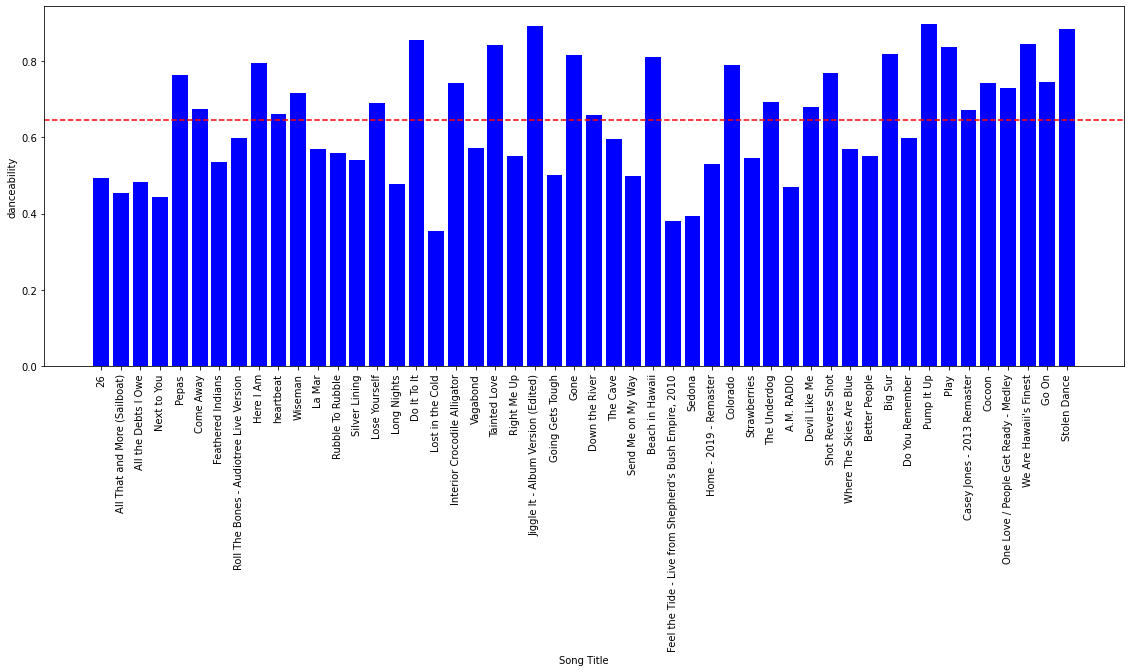

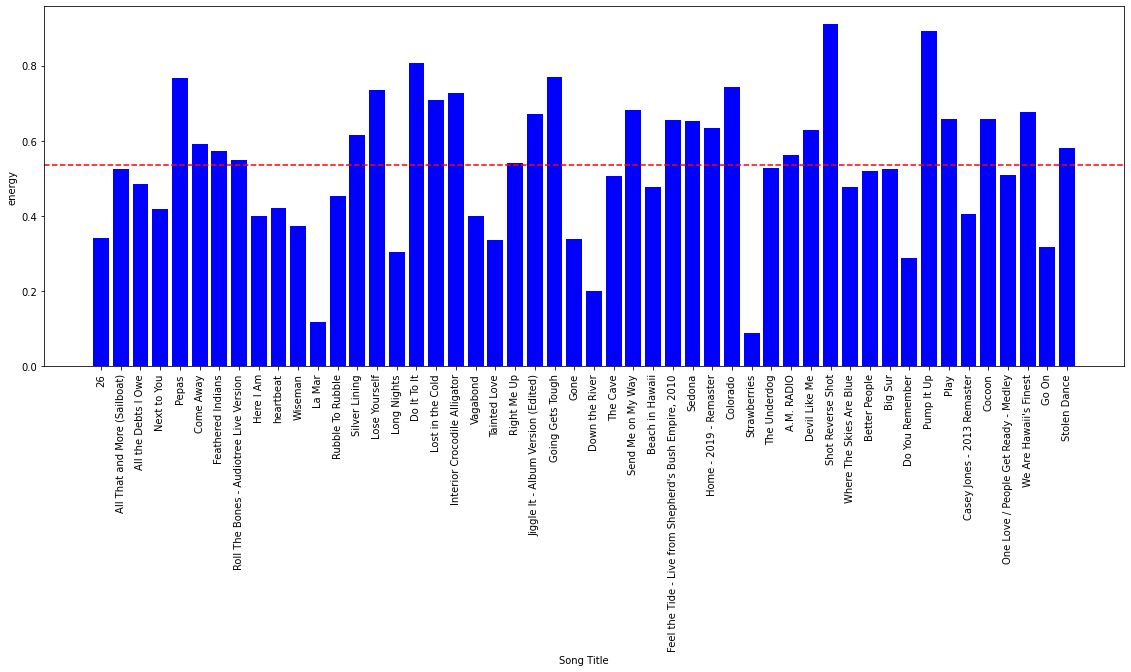

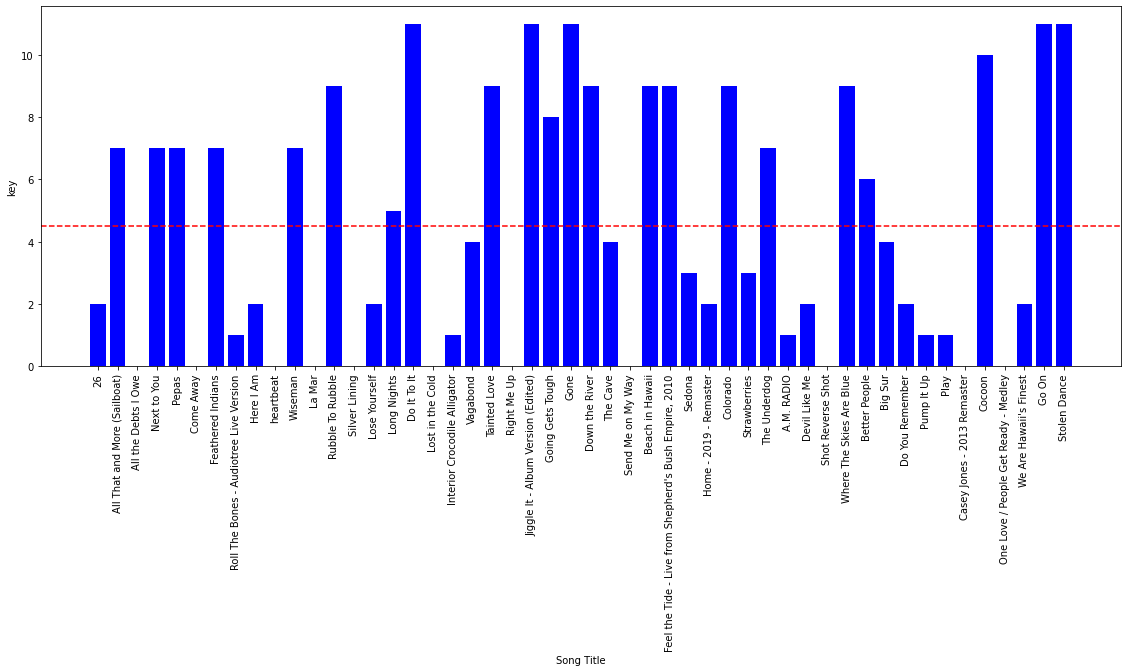

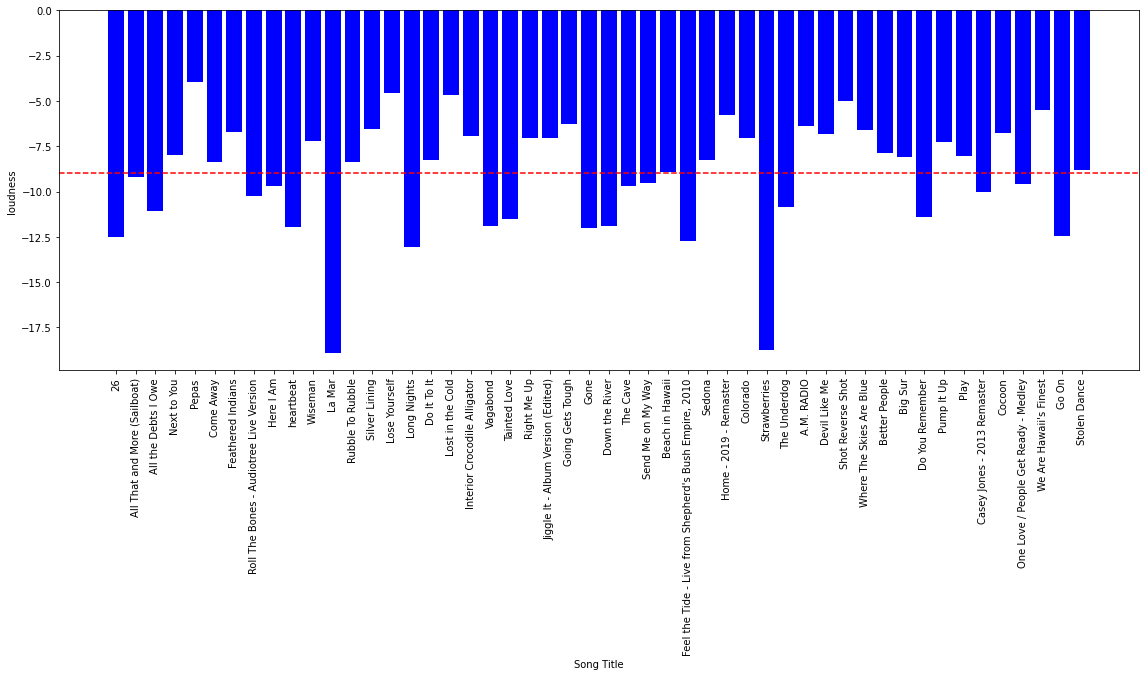

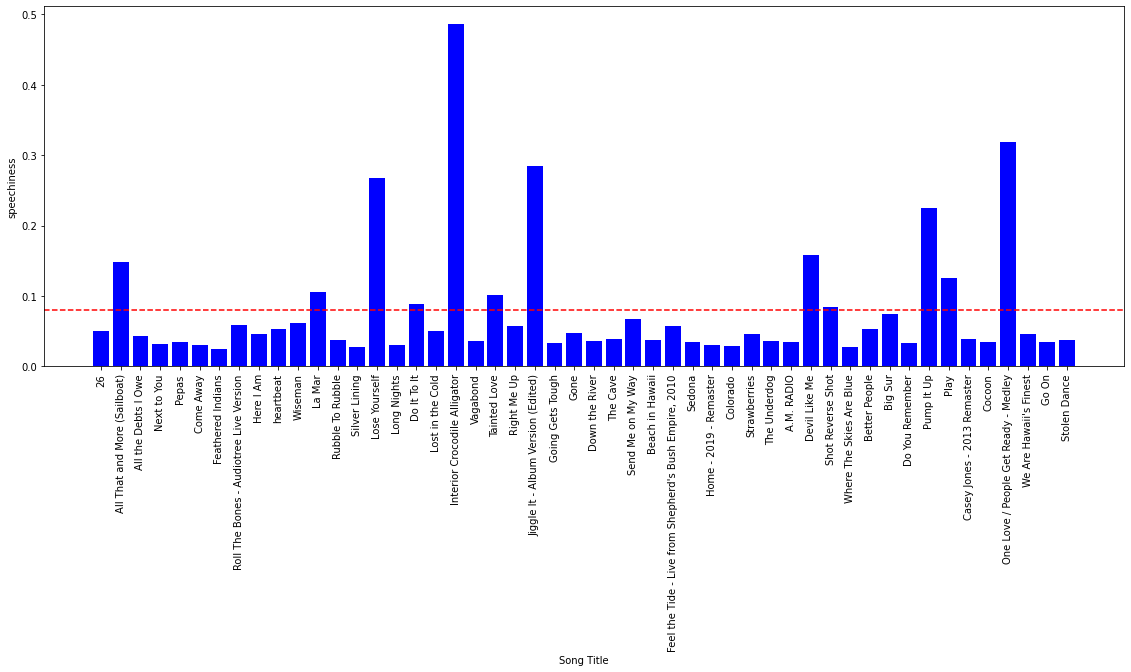

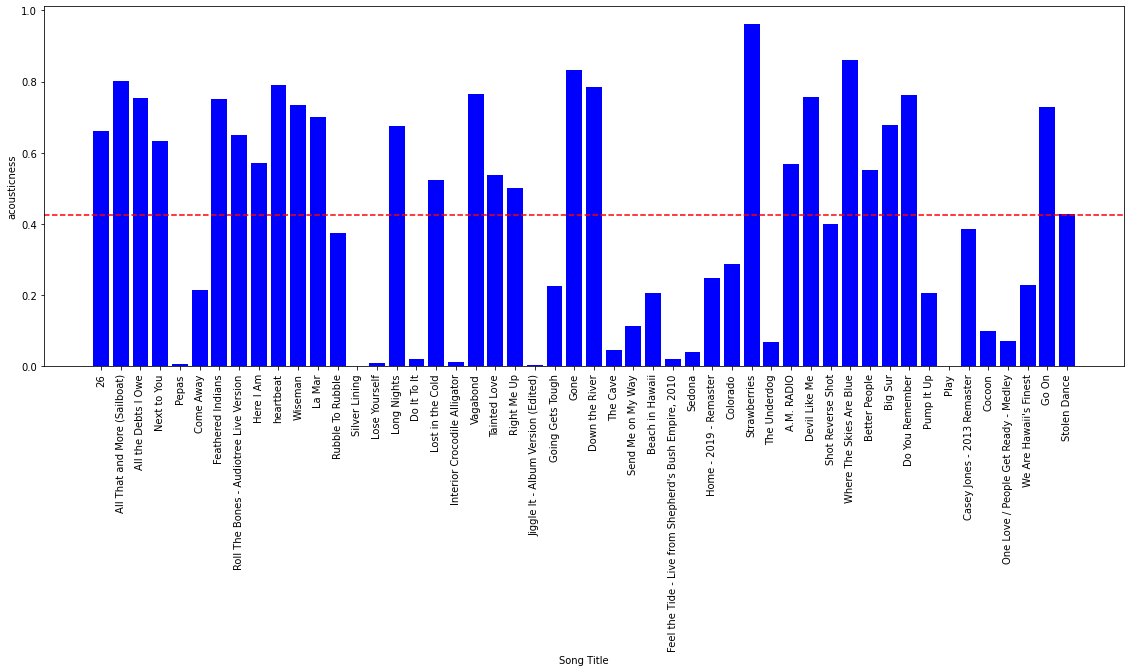

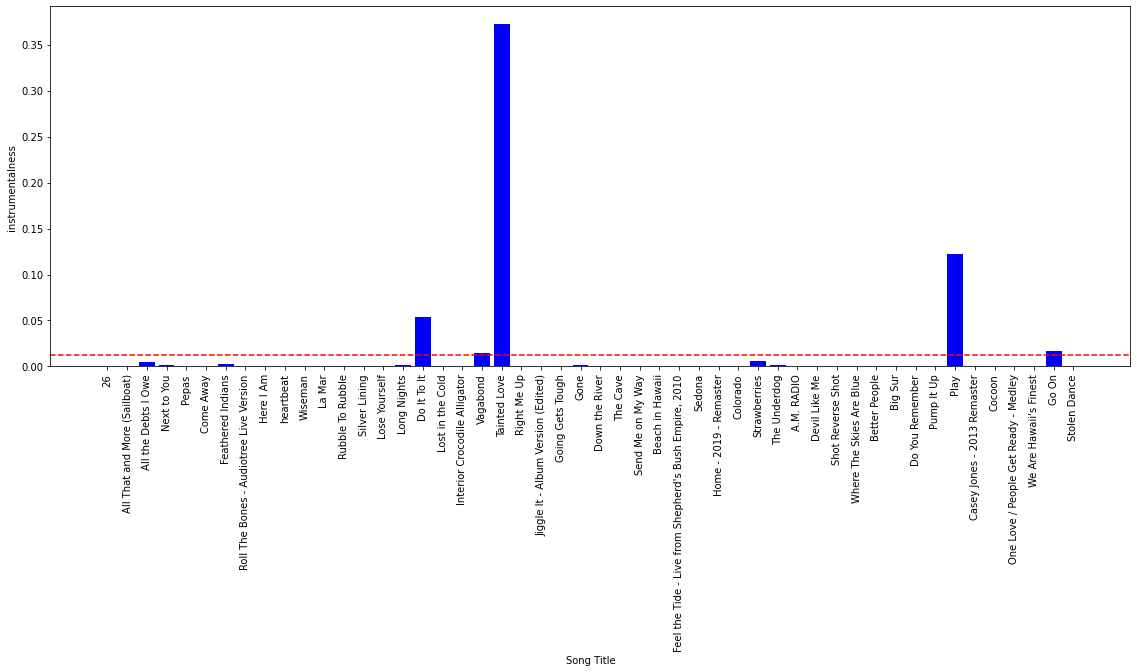

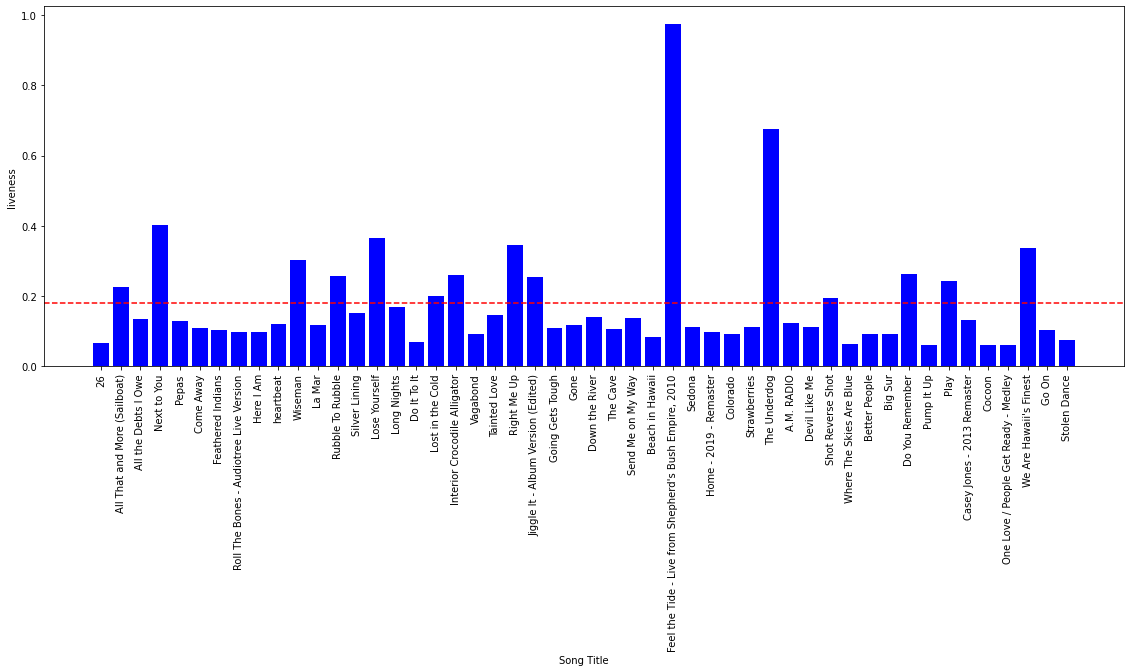

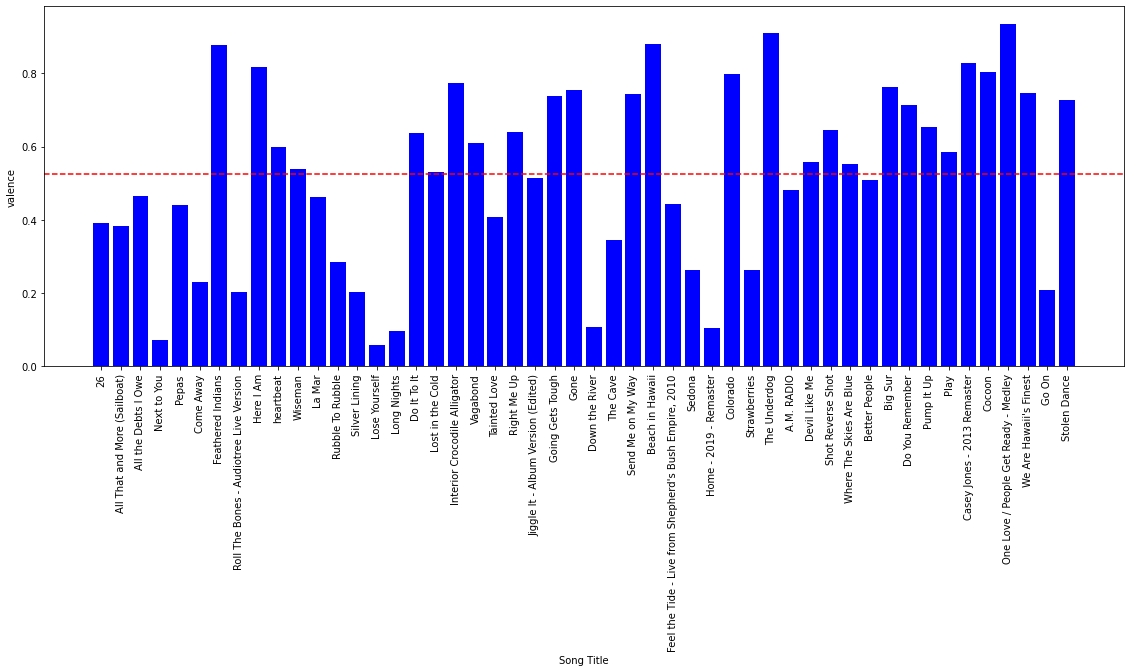

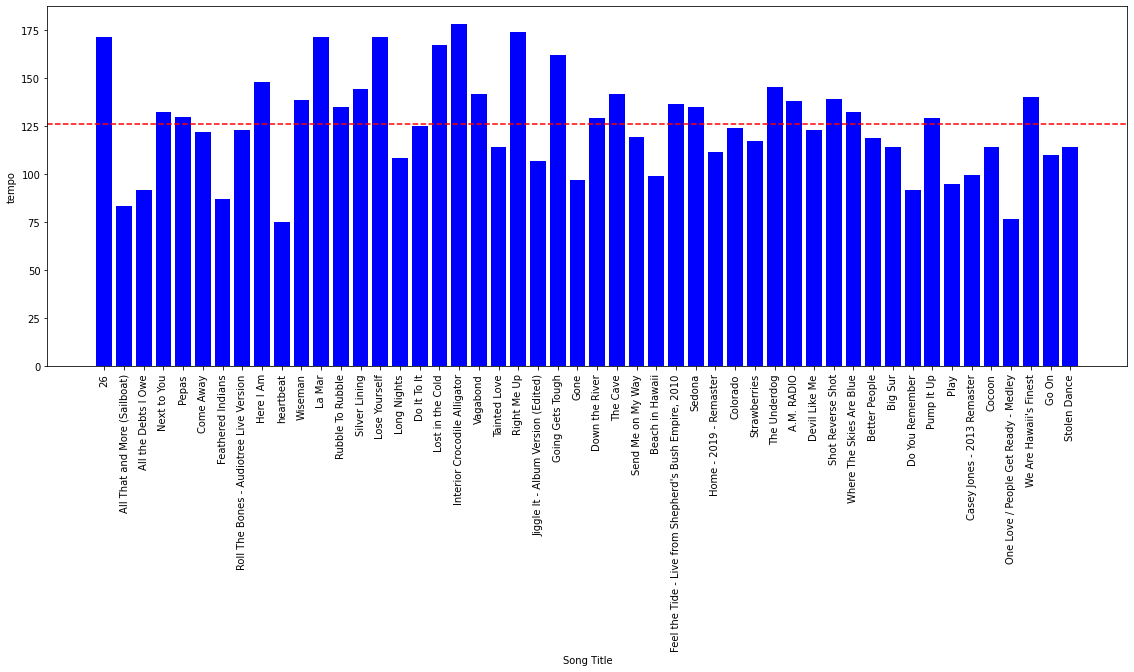

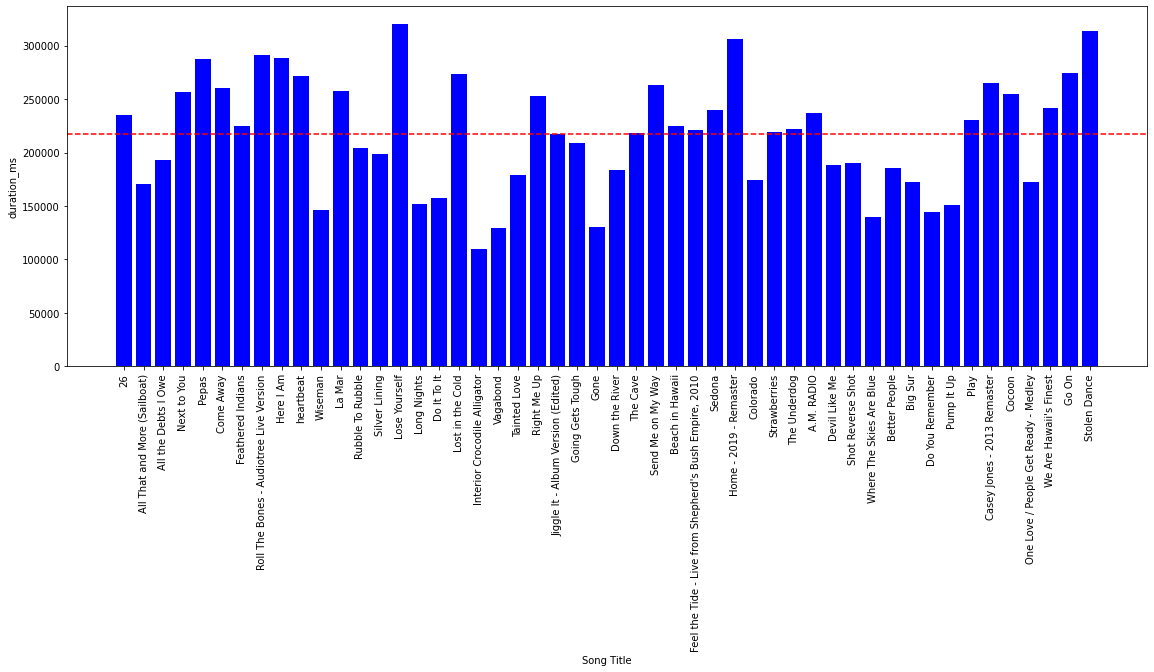

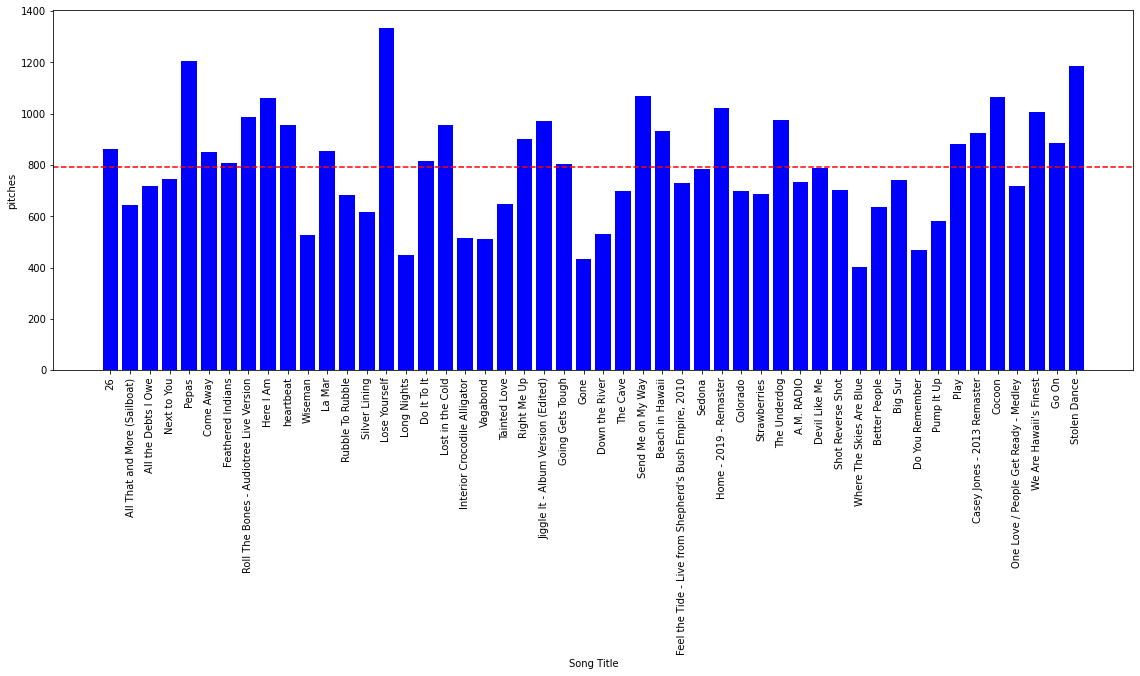

In [12]:


average_features = {}
#Function that will create a graph for each feature and song name to visualize the data. The function returns the average values for each feature. 
#This will allow us to reference which songs the user may like in the future. Because the average data is based of the top 50 songs the user listens to, 
# we can use the averages to understand which songs the user may also like. 
def makeAudioGraph(av_feats, df):
    for column in df: 
        if column != 'id' and column != 'Song_Name':
            average_y = np.average(df[column])
            fig = plt.figure(figsize=(15, 5))
            ax = fig.add_axes([0,0,1,1])
            title = df['Song_Name']
            feature = df[column]
            ax.bar(title,feature, color='blue')
            ax.set_ylabel(column)
            ax.set_xlabel('Song Title')
            plt.xticks(rotation = 90)
            plt.axhline(y= average_y,color='red', linestyle ='dashed')
            plt.show()
            print()
            av_feats[column] = average_y
            
    return av_feats

final_averages = makeAudioGraph(average_features, df)


In [13]:
from sklearn import datasets
from sklearn import preprocessing
import scipy.stats as stats
import seaborn as sns

song_names = []
ids = []
song_names = df['Song_Name']
ids  = df['id']
del df['Song_Name']
del df['id']
df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,pitches
0,0.494,0.341,2,-12.501,0.0508,0.66200,0.000571,0.0673,0.3910,171.210,235416,861
1,0.455,0.525,7,-9.225,0.1490,0.80200,0.000000,0.2260,0.3830,83.237,171025,646
2,0.483,0.486,0,-11.062,0.0434,0.75300,0.004790,0.1340,0.4660,92.048,193049,717
3,0.443,0.419,7,-7.975,0.0321,0.63300,0.001830,0.4040,0.0719,132.204,256520,744
4,0.762,0.766,7,-3.955,0.0343,0.00776,0.000070,0.1280,0.4420,130.001,287120,1206


<AxesSubplot:>

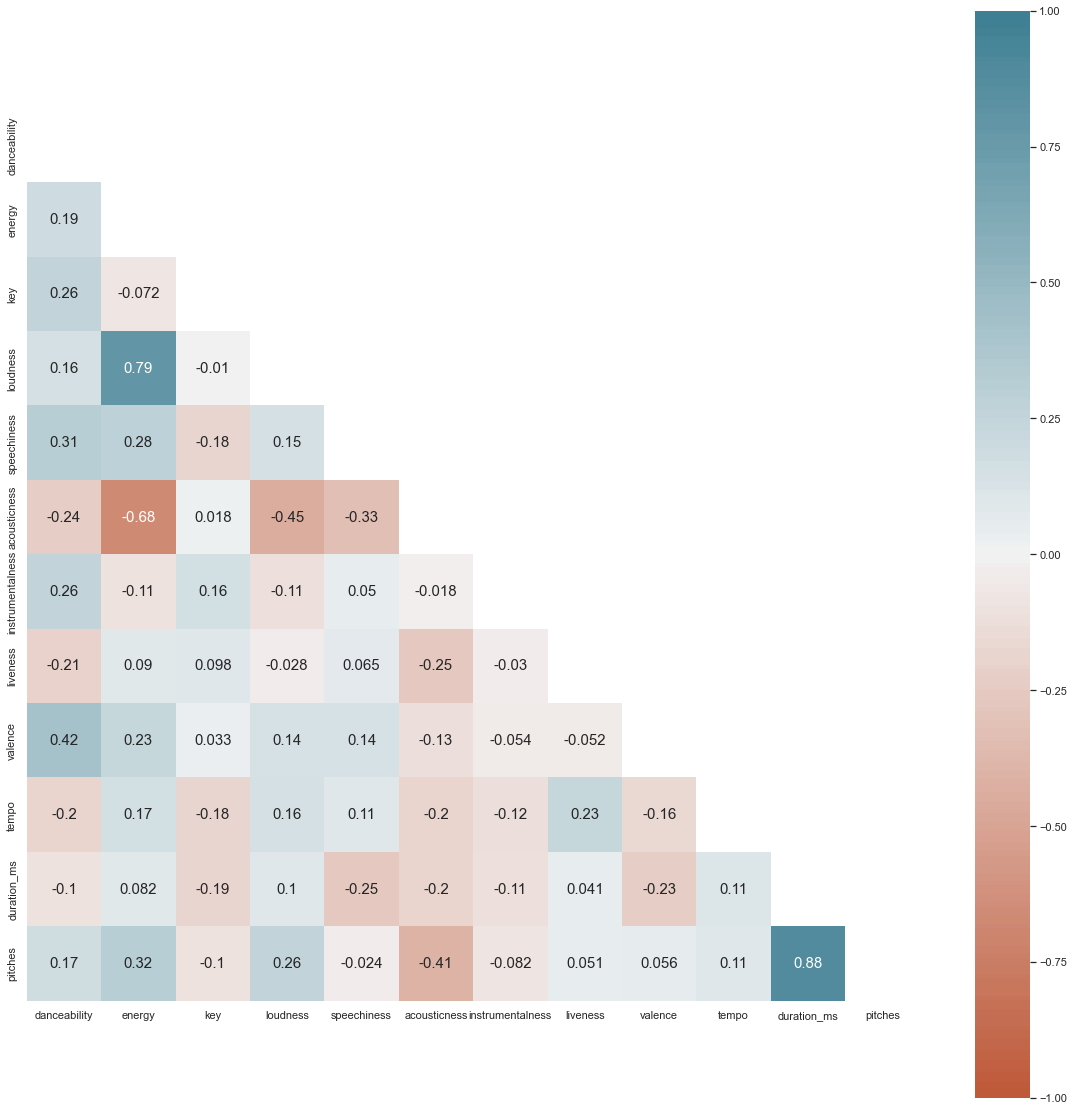

In [14]:
sns.set_theme(style="white")

tracks_correlation = df.corr()
mask = np.triu(np.ones_like(tracks_correlation, dtype=bool))

plt.subplots(figsize=(20,20))
sns.heatmap(
    tracks_correlation,
    
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(22, 220, n=150),
    
    annot=True, annot_kws={'size': 15},
    mask = mask,
    square=True
    
)
# Looking at the correlation graph, we can see that loudness and energy are positively correlated and accousticness and energy are negatively correlated.
# Furthermore, duration and pitches is highly correlated, but this is not helpful because this is known by the understanding that the length of a song will most 
#   likely mean that the song will have more pitches. 

In [15]:
#This block of code with take out outlier songs that are not similar to the rest based on the Z-score value
song_data = []
count_ = 0
for i in song_names:
    song_data.append(count)
    count += 1

id_data = []
count_ = 0
for i in ids:
    id_data.append(count)
    count += 1

df['Song_Name'] = song_data
df['id'] = id_data

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)
print(filtered_entries)
counter = 0
for i in filtered_entries:
    if i != True:
        del song_names[counter]
        del ids[counter]
    counter += 1

new_df = df[filtered_entries]


0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18    False
19     True
20    False
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29    False
30     True
31     True
32     True
33    False
34    False
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
dtype: bool


/var/folders/31/j25r7xhj7_n6w5wh3k5gwtm00000gn/T/ipykernel_6553/3725350455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Song_Name'] = song_names
/var/folders/31/j25r7xhj7_n6w5wh3k5gwtm00000gn/T/ipykernel_6553/3725350455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['id'] = ids


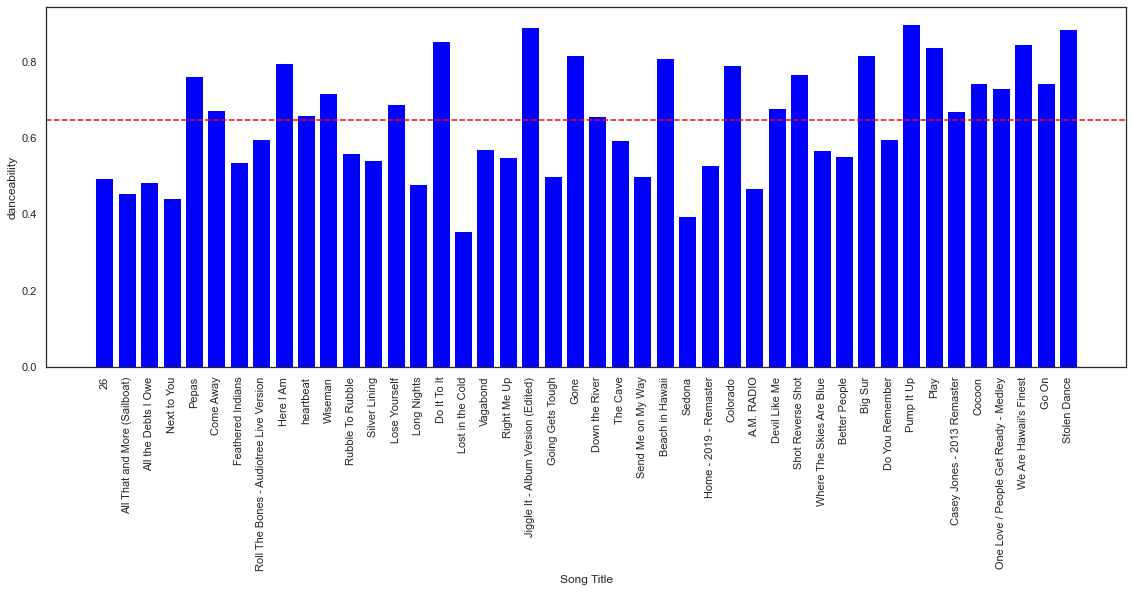

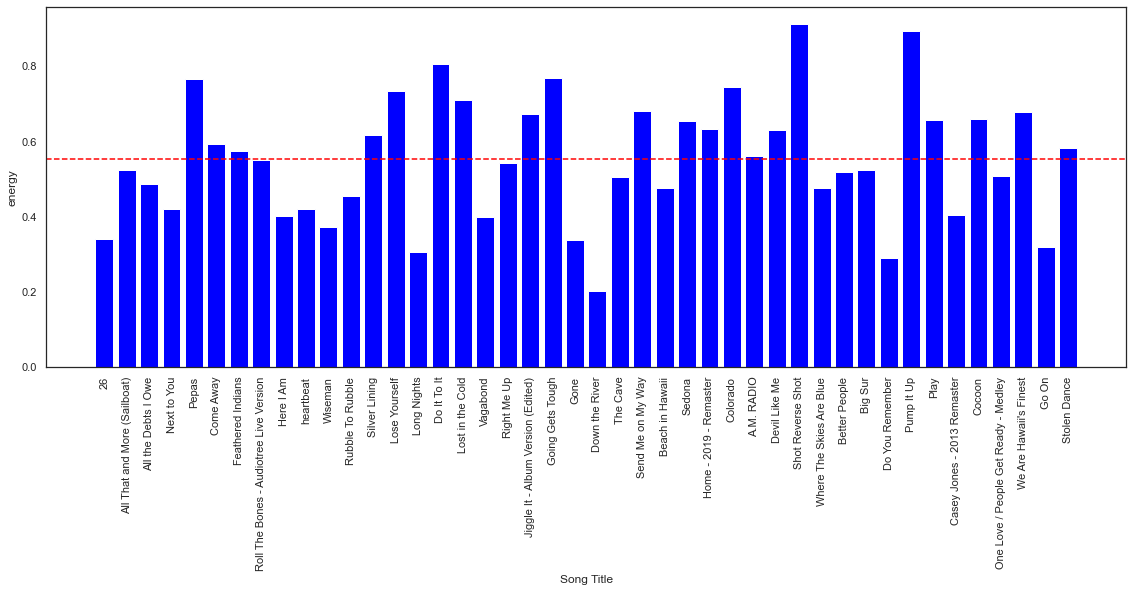

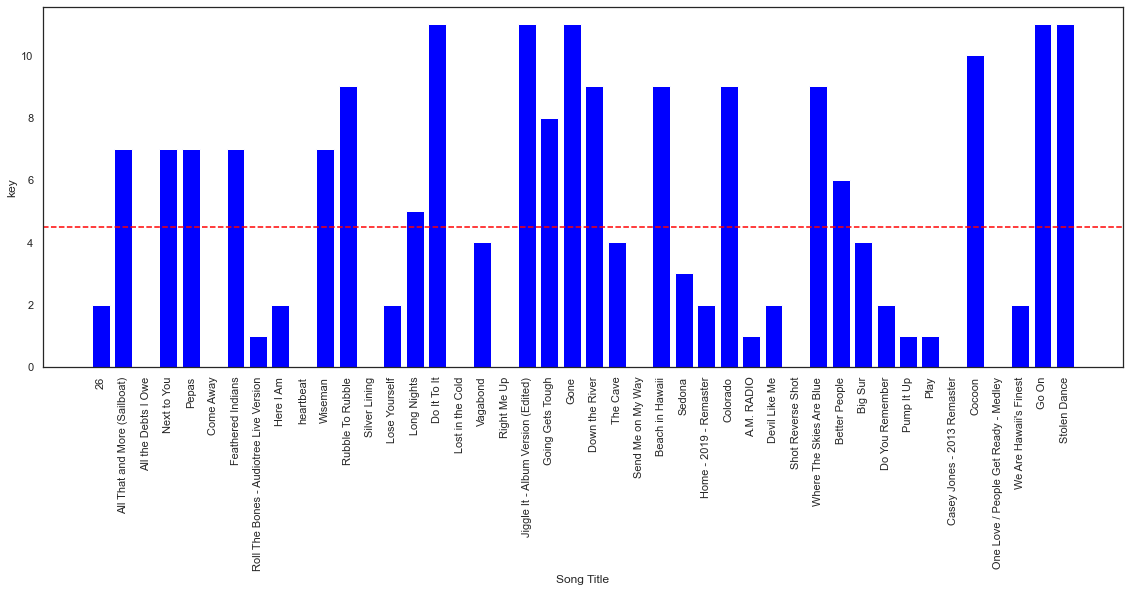

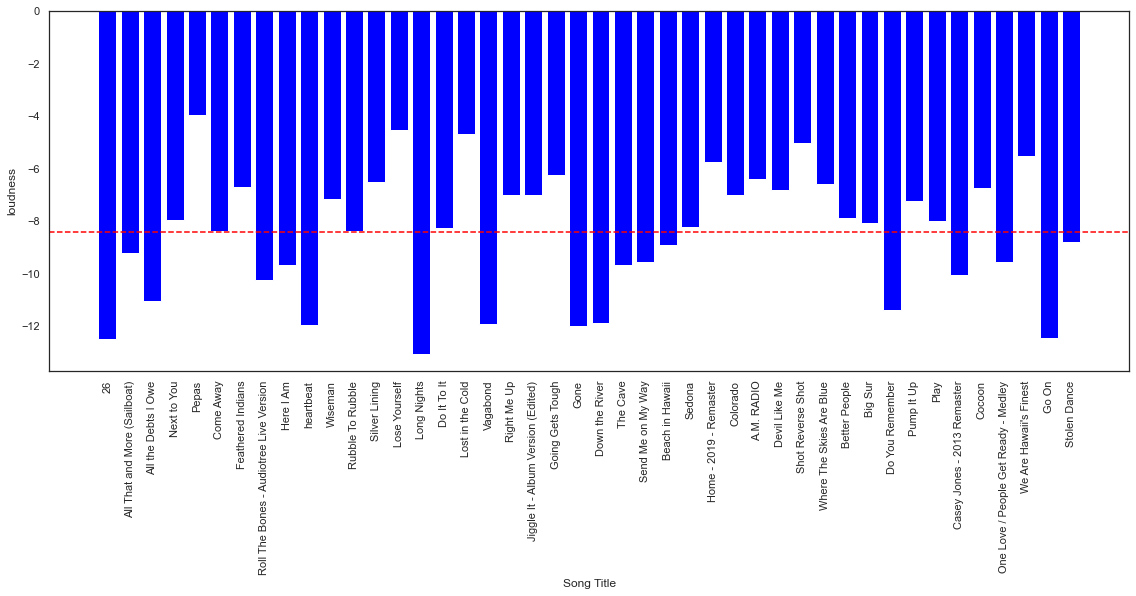

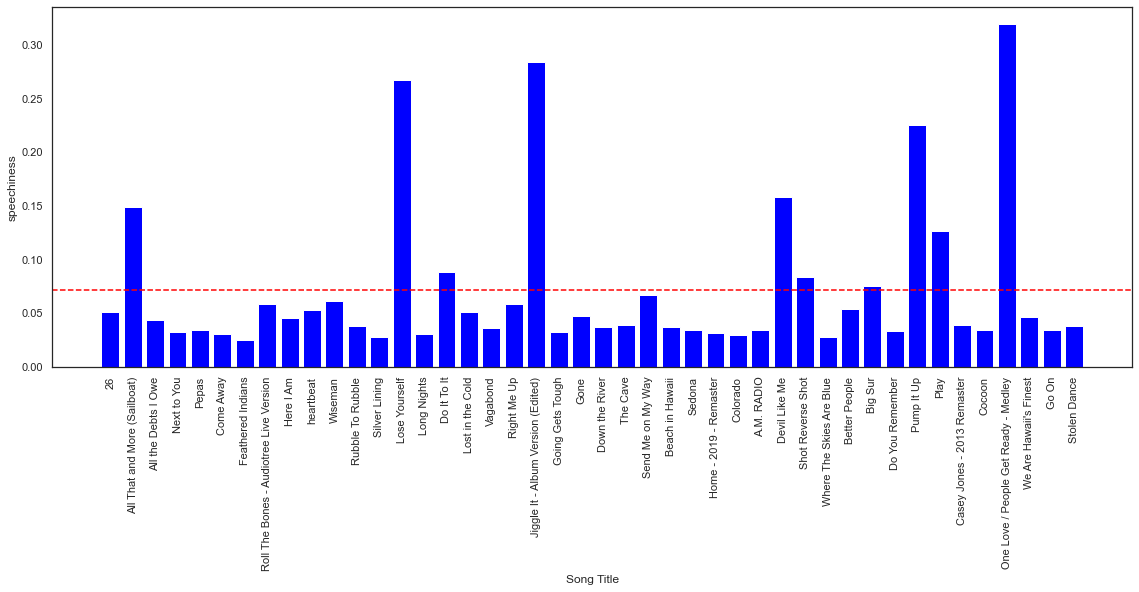

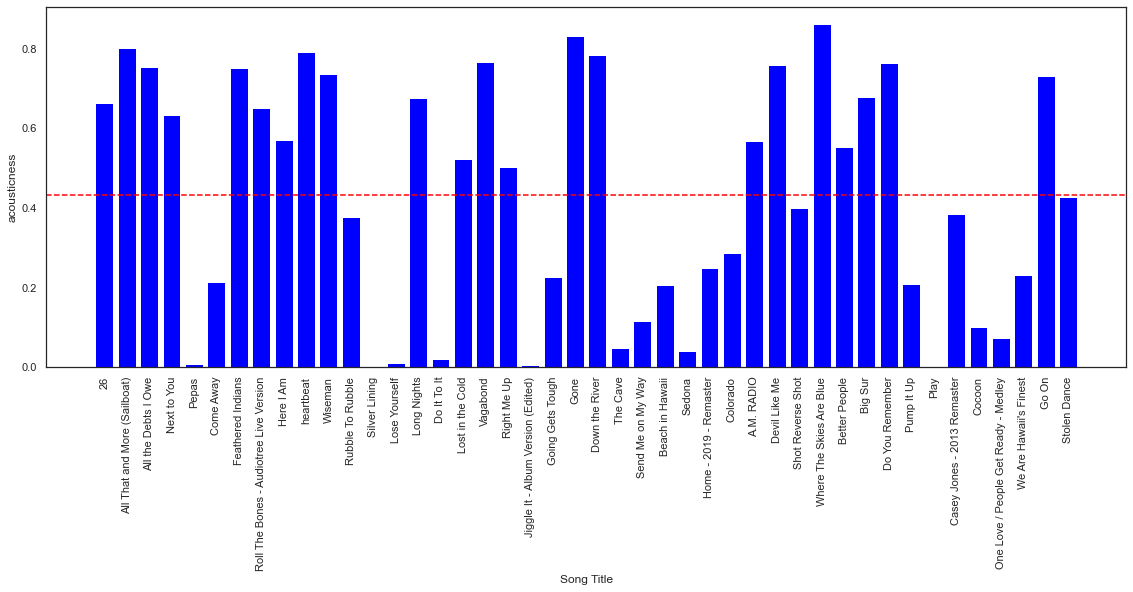

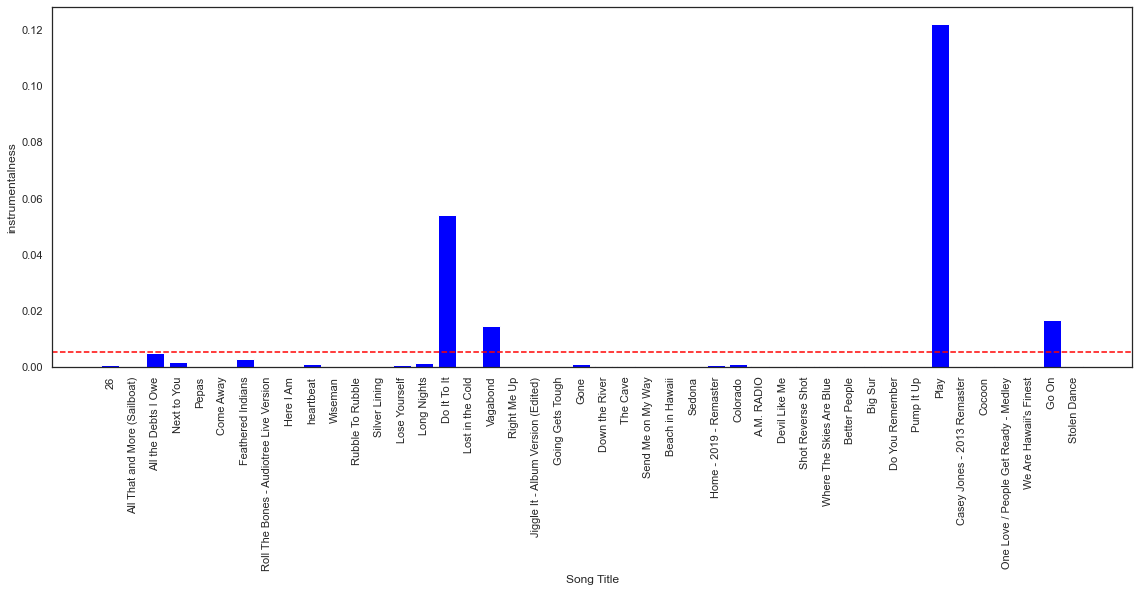

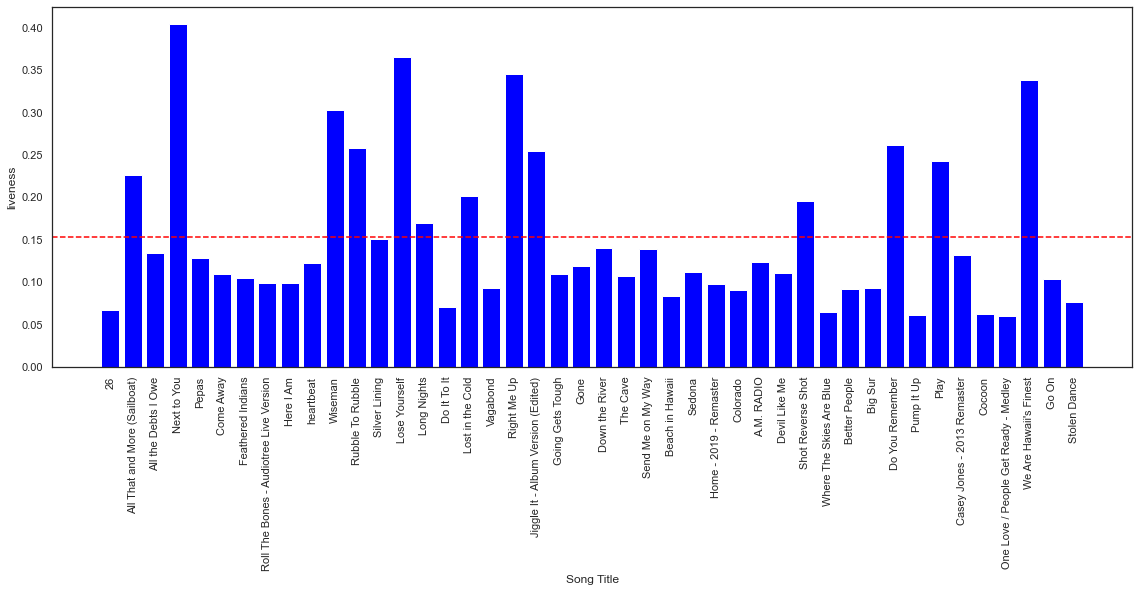

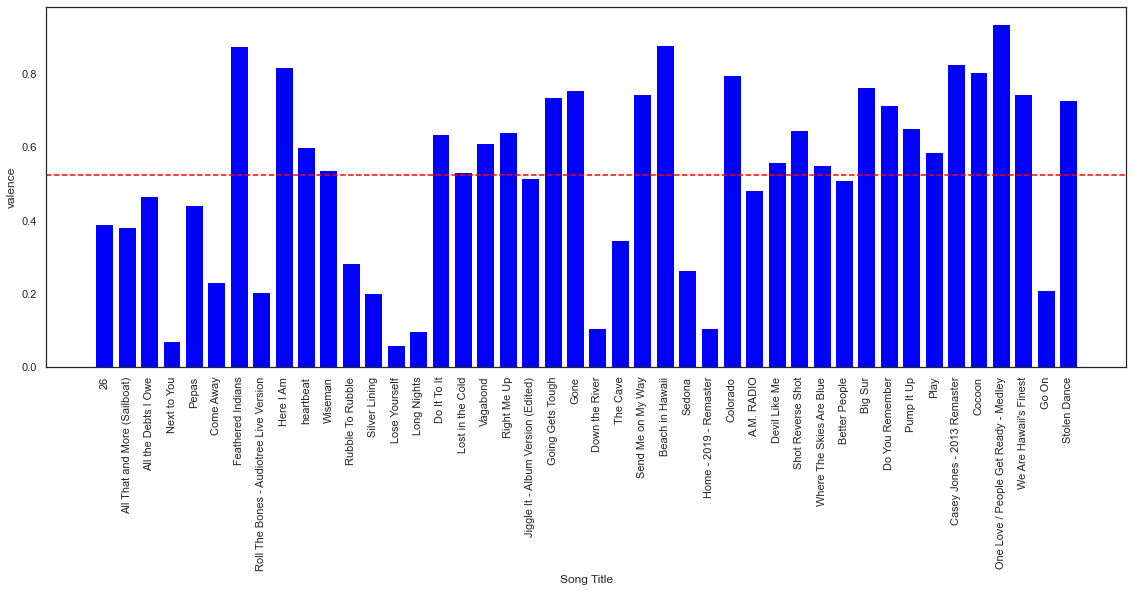

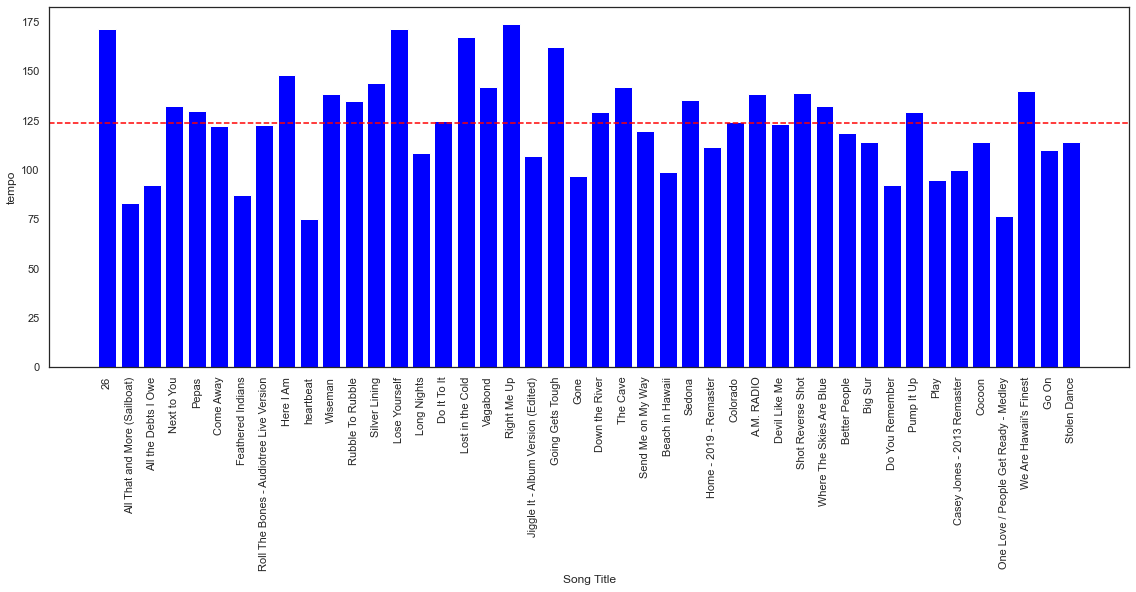

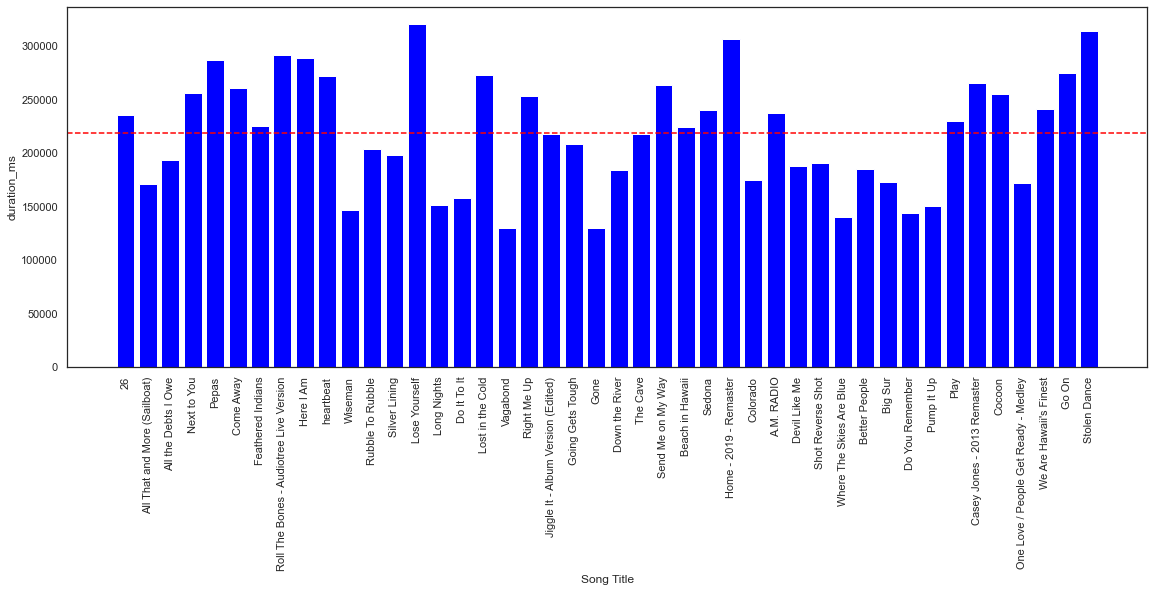

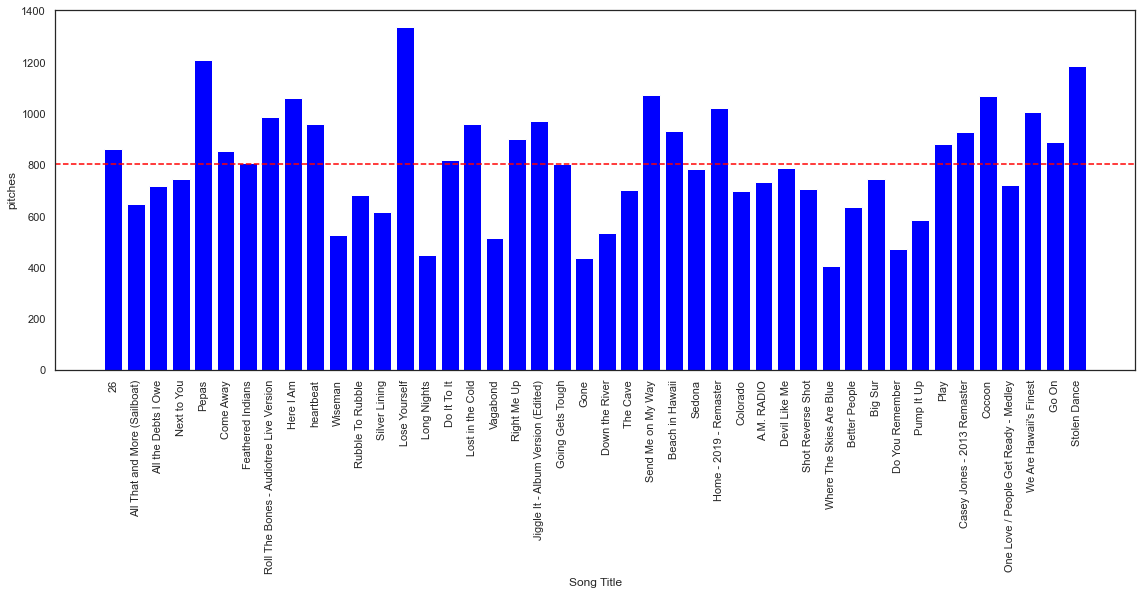


Values with outliers:
Average of:  danceability  is:  0.64558
Average of:  energy  is:  0.535074
Average of:  key  is:  4.52
Average of:  loudness  is:  -8.99978
Average of:  speechiness  is:  0.07962999999999999
Average of:  acousticness  is:  0.4252068600000001
Average of:  instrumentalness  is:  0.012112187799999998
Average of:  liveness  is:  0.18013399999999996
Average of:  valence  is:  0.5263460000000001
Average of:  tempo  is:  125.88722000000001
Average of:  duration_ms  is:  217077.62
Average of:  pitches  is:  794.56

Values with outliers taken out
Average of:  danceability  is:  0.6478409090909091
Average of:  energy  is:  0.5522727272727272
Average of:  key  is:  4.4772727272727275
Average of:  loudness  is:  -8.415931818181818
Average of:  speechiness  is:  0.07153181818181818
Average of:  acousticness  is:  0.4308282500000001
Average of:  instrumentalness  is:  0.005121452045454546
Average of:  liveness  is:  0.15269772727272726
Average of:  valence  is:  0.524006818181

In [16]:
new_df['Song_Name'] = song_names
new_df['id'] = ids
average_features = {}
wo_outliers = makeAudioGraph(average_features, new_df)

#Print the average values with outliers and average values without outliers. 
print("Values with outliers:")
for key, value in final_averages.items():
    print('Average of: ',key, ' is: ', value)
print()
print("Values with outliers taken out")
for key, value in wo_outliers.items():
    print('Average of: ',key, ' is: ', value)

In [17]:
#Now see which feature has values that are closest to the average

In [18]:
print(min(new_df['danceability']), max(new_df['danceability']))

0.356 0.898


In [19]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('loudness ~ energy', data=new_df)
model = model.fit()

loudness_predict = model.predict()

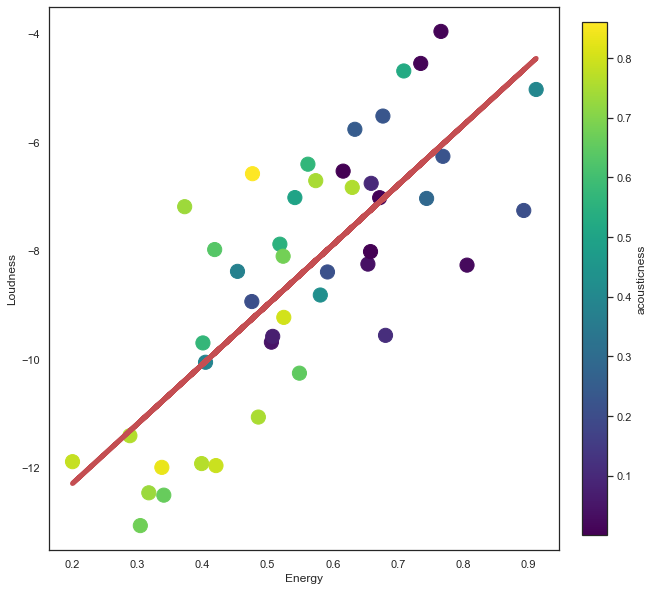

In [20]:
# This scatterplot shows that the lower the energy and the lower loudness, the song is most likely more acoustic. 

x = new_df['energy']
y = new_df['loudness']
colors = new_df['acousticness']
plt.figure(figsize=(10,10))

plt.scatter(x, y, c=colors, cmap='viridis', s=200)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.plot(new_df['energy'], loudness_predict, 'r', linewidth=5)   # regression line
plt.colorbar(fraction=0.046, pad=0.04, label = 'acousticness')
plt.show()

In [21]:
sp_albums = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="d7ab2112e221473a8b2a7a88c1aac45e",
                                                           client_secret="fde374bcf24947c1812412a474d3ef94"))

new_albums = sp_albums.new_releases(country=None, limit=50, offset=0)

In [22]:
albums_dict = {}
for i in new_albums['albums']['items']:
    if i['album_type'] != 'single':
        albums_dict[i['name']] = i['id']

In [23]:
new_albums_tracks = {}
for key, value in albums_dict.items():
    new_albums_tracks[key] = []
for key, value in albums_dict.items():
    tracks = sp_albums.album_tracks(value, limit=50, offset=0, market=None)
    for i in tracks['items']:
        new_albums_tracks[key].append([i['name'],i['id']])
        # print()
        # print(i['name'],'-',i['id'])
        # print()
    print('done album')


done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album
done album


In [50]:
for key, value in new_albums_tracks.items():
    print('Tracks and Ids on: ', key)
    print(value)
    print()  

# for i in new_albums_tracks: 
#     print(len(i))

Tracks and Ids on:  7220
[['Started From', '03cBu30KbreokkrclGPQf8'], ['Headtaps', '3HWQrKGmb05pcNoTIzzBwL'], ['AHHH HA', '2bPI4TKM4oTxl2SijUXM2J'], ['Shootout @ My Crib', '23PzodQrNGxbywlba84Rva'], ['Golden Child', '4UO8Ywh6dKZVJZ9iUofEhD'], ['No Interviews', '1tXDziDamT0we73CTDsgsv'], ['Petty Too (feat. Future)', '0VlpgNPHWCyh8xxLcaK2fp'], ['Barbarian', '6DPEzXUB3ZVzT2NDh7MkJt'], ['What Happened To Virgil (feat. Gunna)', '7ohROa13QK43JBRqfCmz4P'], ['Grow Up/Keep It On Speaker', '4AP3P2EVKANYuJk3Fi3v6Y'], ['Smoking & Thinking', '1OybHaoLAhB6biFWfaCVDw'], ['Blocklist', '79cq3PF1wgkDVTAFMlOjNB'], ['Difference Is (feat. Summer Walker)', '1qzoBWC6US7szlOsIQ1VxZ'], ['Federal Nightmares', '4W730PJT4aw79pZ9D8BLhl'], ['Love Dior Banks', '08CG6gsTUz2SMdKMycSGKZ'], ['Pissed Me Off', '0fFeockUN32c4z1bguUIQH'], ['Broadway Girls (feat. Morgan Wallen)', '2pOUHNwZJrFffS42SxPwt0']]

Tracks and Ids on:  WHO CARES?
[['KEEP IT UP', '1dxqk42KIlMyrSawZ5YjBE'], ['OPEN A WINDOW (feat. Tyler, The Creator)', 

In [59]:
def check_if_all_none(list_of_elem):
    """ Check if all elements in list are None """
    result = True
    for elem in list_of_elem:
        if elem is not None:
            return False
    return result

def albumSongFeatures(new_albums_tracks_input):
    album_features = {}
    for album, song in new_albums_tracks_input.items():
        for i in song:
            #print(i[0]," ", i[1])
            album_features[i[1]] = []
    
    for song, value in album_features.items():
        
        track_info = sp.audio_features(song)
        checked_track_info = check_if_all_none(track_info)
        if checked_track_info == False:
            album_features[song].append(track_info)
       
    return album_features

album_song_features = albumSongFeatures(new_albums_tracks)



In [69]:
print(len(album_song_features))

album_song_fts_df = pd.DataFrame()
album_song_fts_df['id'] = album_song_features.keys()
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
duration_ms = []
time_signature = []



for id in album_song_fts_df['id']:
    if len(album_song_features[id]) == 0:
        danceability.append('NaN')
        energy.append('NaN')
        key.append('NaN')
        loudness.append('NaN')
        mode.append('NaN')
        speechiness.append('NaN')
        acousticness.append('NaN')
        instrumentalness.append('NaN')
        liveness.append('NaN')
        valence.append('NaN')
        tempo.append('NaN')
        duration_ms.append('NaN')
        time_signature.append('NaN')
    else:

        danceability.append(album_song_features[id][0][0]['danceability'])
        energy.append(album_song_features[id][0][0]['energy'])
        key.append(album_song_features[id][0][0]['key'])
        loudness.append(album_song_features[id][0][0]['loudness'])
        mode.append(album_song_features[id][0][0]['mode'])
        speechiness.append(album_song_features[id][0][0]['speechiness'])
        acousticness.append(album_song_features[id][0][0]['acousticness'])
        instrumentalness.append(album_song_features[id][0][0]['instrumentalness'])
        liveness.append(album_song_features[id][0][0]['liveness'])
        valence.append(album_song_features[id][0][0]['valence'])
        tempo.append(album_song_features[id][0][0]['tempo'])
        duration_ms.append(album_song_features[id][0][0]['duration_ms'])
        time_signature.append(album_song_features[id][0][0]['time_signature'])


227


In [70]:




album_song_fts_df['danceability'] = danceability
album_song_fts_df['energy'] = energy
album_song_fts_df['key'] = key
album_song_fts_df['loudness'] = loudness
album_song_fts_df['mode'] = mode
album_song_fts_df['speechiness'] = speechiness
album_song_fts_df['acousticness'] = acousticness
album_song_fts_df['instrumentalness'] = instrumentalness
album_song_fts_df['liveness'] = liveness
album_song_fts_df['valence'] = valence
album_song_fts_df['tempo'] = tempo
album_song_fts_df['type'] = type
album_song_fts_df['duration_ms'] = duration_ms
album_song_fts_df['time_signature'] = time_signature

album_song_fts_df

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
0,03cBu30KbreokkrclGPQf8,0.624,0.561,7,-8.757,1,0.476,0.0895,0,0.109,0.357,159.186,audio_features,121060,4
1,3HWQrKGmb05pcNoTIzzBwL,0.562,0.609,5,-7.672,1,0.279,0.0461,0,0.131,0.38,158.803,audio_features,173880,4
2,2bPI4TKM4oTxl2SijUXM2J,0.676,0.61,1,-9.185,1,0.273,0.000114,0.000002,0.191,0.519,156.005,audio_features,186538,4
3,23PzodQrNGxbywlba84Rva,0.754,0.553,10,-8.777,0,0.394,0.06,0,0.108,0.195,90.6,audio_features,153813,4
4,4UO8Ywh6dKZVJZ9iUofEhD,0.841,0.532,2,-9.307,1,0.278,0.00864,0.000002,0.268,0.319,79.993,audio_features,114580,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,79fQyEcdOTNt8fMeRqtBA8,0.798,0.578,5,-7.569,0,0.336,0.0556,0,0.125,0.722,139.999,audio_features,125567,4
223,0q9RZyqkP5R1TKS6V5HJ0C,0.718,0.605,0,-8.018,1,0.38,0.0807,0,0.132,0.68,159.683,audio_features,168000,4
224,7BNMzpH9CAgKVSzq1fdJDM,0.744,0.648,1,-6.846,1,0.188,0.159,0,0.125,0.534,138.046,audio_features,180870,4
225,1Ux2ogUEYjeWaatIiRh1Wo,0.857,0.712,2,-6.272,1,0.333,0.117,0,0.301,0.599,81.493,audio_features,235583,4


In [71]:
song_name = {}
for album, songs in new_albums_tracks.items():
    for i in songs:
        song_name[i[1]] = i[0]


In [72]:
song_name_list = []
for i in album_song_fts_df['id']:
    for id in song_name:
        if i == id:
            song_name_list.append(song_name[id])
            

In [73]:
album_song_fts_df['Song_Name'] = song_name_list

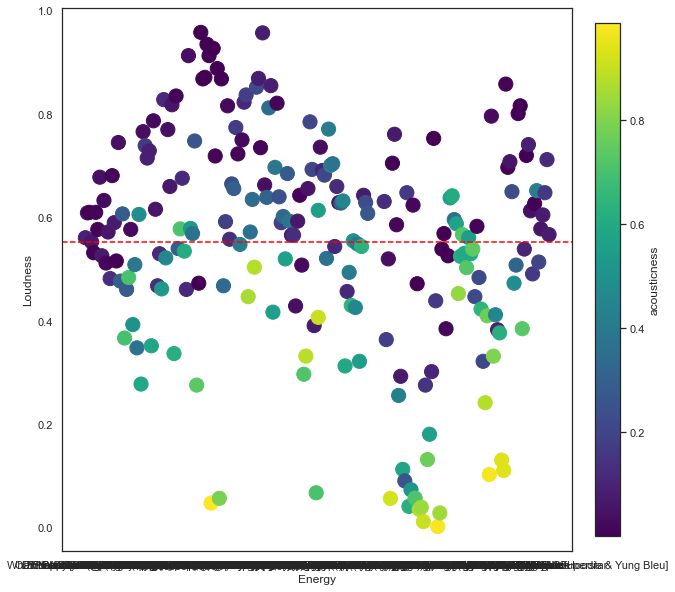

In [74]:
album_song_fts_df
#del album_song_fts_df['type']
y = album_song_fts_df['energy']
x = album_song_fts_df['Song_Name']
colors = album_song_fts_df['acousticness']
plt.figure(figsize=(10,10))

plt.scatter(x, y, c=colors, cmap='viridis', s=200)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.axhline(y= wo_outliers['energy'],color='red', linestyle ='dashed')
plt.colorbar(fraction=0.046, pad=0.04, label = 'acousticness')
plt.show()

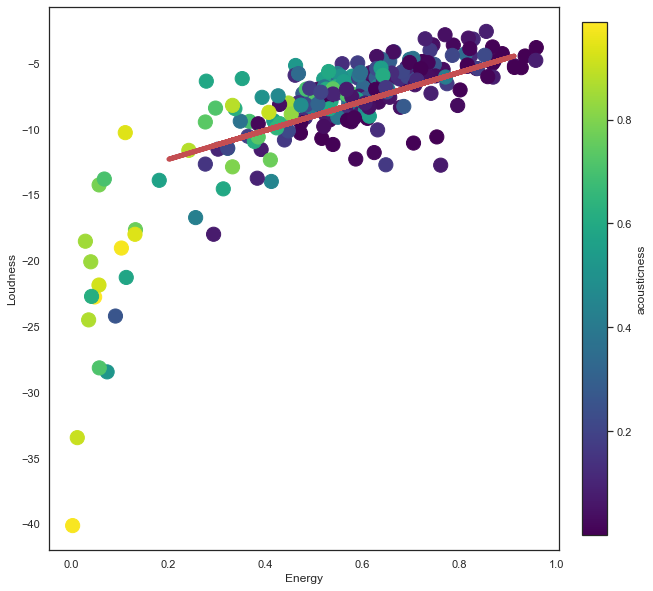

In [75]:
average_features_2 = {}

x = album_song_fts_df['energy']
y = album_song_fts_df['loudness']
colors = album_song_fts_df['acousticness']
plt.figure(figsize=(10,10))

plt.scatter(x, y, c=colors, cmap='viridis', s=200)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.plot(new_df['energy'], loudness_predict, 'r', linewidth=5)   # regression line
plt.colorbar(fraction=0.046, pad=0.04, label = 'acousticness')
plt.show()

NameError: name 'album_song_fts_df' is not defined